# Preprare configs

This notebook supports the process of preparing config files.
The goals of the notebooks are as follows:
- extracting selected frame(s) from the video
- setting ant testing unwrapping parameters (camera view -> bird's eye view)

In [1]:
import sys
#sys.path.insert(0,'../..')
sys.path.insert(0,'..')

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pathlib 

from moveoverlib.functions import *

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/home/przemek/anaconda3/envs/object_detection/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


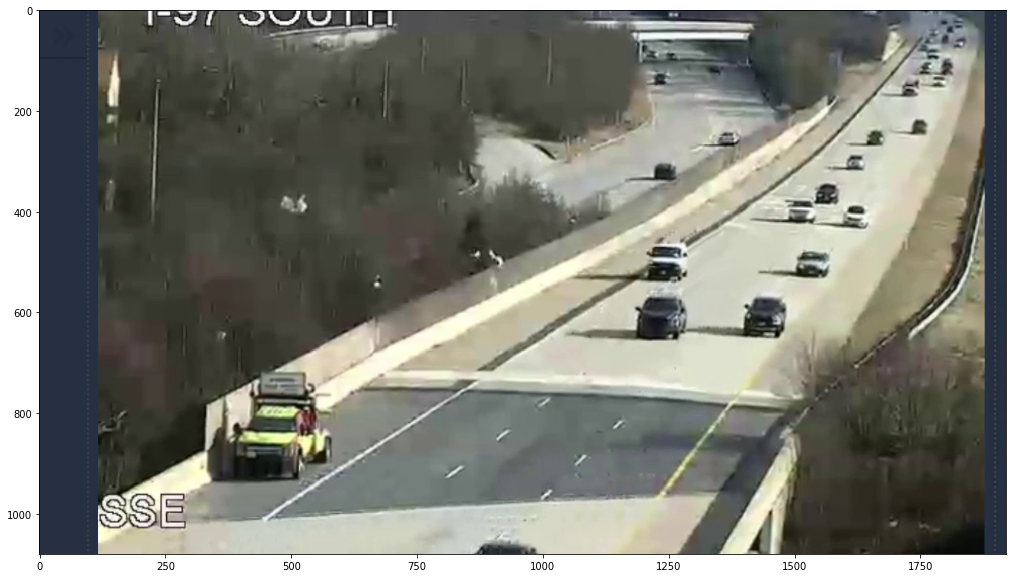

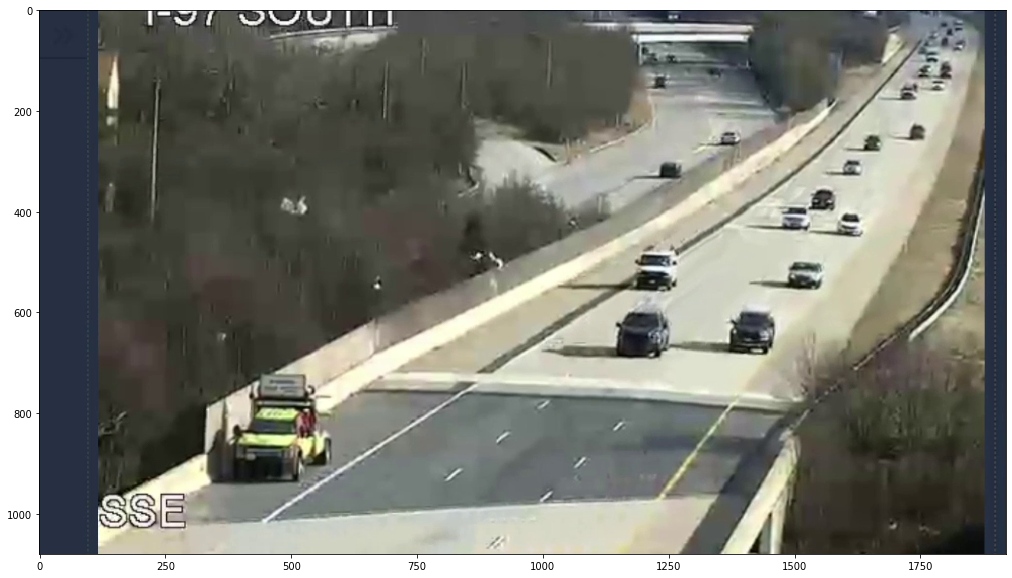

In [2]:
VIDEO_FILE = '/data/MoveOver/Videos/I97-New Cut Road HH 3-4-21.mp4'

pathlib.Path('./images/').mkdir(parents=True, exist_ok=True)
extractFrame(VIDEO_FILE, frameno = 16, dest_file = './images/frame_1.jpg');
extractFrame(VIDEO_FILE, frameno = 25, dest_file = './images/frame_2.jpg');


Points for source (camera view) and destination (image view)
First four points are used for unwrapping, the rest is just display at tests

In [3]:
SRC = np.float32([ # Frame
        [1027, 296],
        [1231.0, 970.0], 
        [842.0, 759.0], 
        [1377.0, 787.0],
        [446.0, 1016.0], 
    ])
DST = np.float32([ # Bird eye view
        [620, 1173],
        [79.0, 104.0], 
        [174.0, 220.0],
        [127.0, 236.0],    
        [110.0, 37.0], 
])

print ('  "cameraPoints" : [[{}, {}], [{}, {}], [{}, {}], [{}, {}]],'.format(
    int(SRC[0][0]), int(SRC[0][1]),
    int(SRC[1][0]), int(SRC[1][1]),
    int(SRC[2][0]), int(SRC[2][1]),
    int(SRC[3][0]), int(SRC[3][1])
))

print ('  "birdEyePoints" : [[{}, {}], [{}, {}], [{}, {}], [{}, {}]],'.format(
    int(DST[0][0]), int(DST[0][1]),
    int(DST[1][0]), int(DST[1][1]),
    int(DST[2][0]), int(DST[2][1]),
    int(DST[3][0]), int(DST[3][1]),
))



  "cameraPoints" : [[1027, 296], [1231, 970], [842, 759], [1377, 787]],
  "birdEyePoints" : [[620, 1173], [79, 104], [174, 220], [127, 236]],


In [4]:
M = cv2.getPerspectiveTransform(SRC[:4], DST[:4])
Minv = cv2.getPerspectiveTransform(DST[:4], SRC[:4])

[1027.  296.] -> [ 620. 1173.]
[1231.  970.] -> [ 79. 104.]
[842. 759.] -> [174. 220.]
[1377.  787.] -> [127. 236.]
[ 446. 1016.] -> [99.04593   -1.8755177]


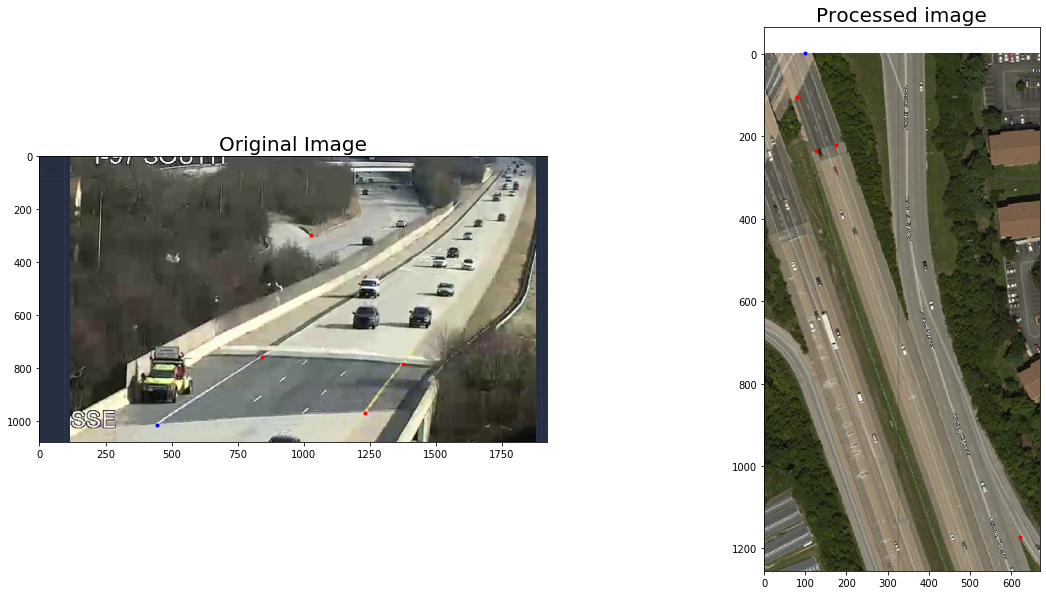

In [5]:
map_file = './images/I97_NewCutRoad_map.jpg'
ret = displayPoints(SRC, M, './images/frame_1.jpg', map_file)

[ 620. 1173.] -> [1027.  296.]
[ 79. 104.] -> [1231.  970.]
[174. 220.] -> [842. 759.]
[127. 236.] -> [1377.  787.]
[110.  37.] -> [545.0886  967.06433]


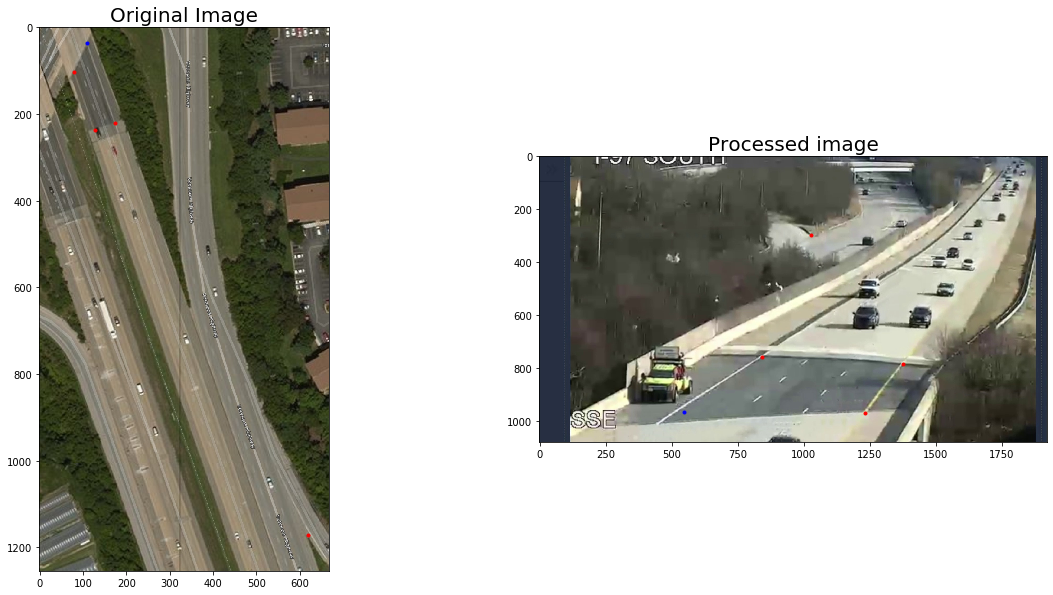

In [6]:
ret = displayPoints(DST, Minv, map_file,  './images/frame_1.jpg')

# Lane masks

In [ ]:
MASK_PATH = '../MoveOver/PAI81_66/lanes.png'

In [ ]:


mask = (255*plt.imread(MASK_PATH)).astype(int)
if (len(mask.shape) == 3) and (mask.shape[2] > 1):
    #mask = np.sum(mask, axis=2)
    mask = mask[:, :, 0]
plt.imshow(mask, cmap='gray')
list(np.unique(mask, return_counts=True))

In [ ]:
np.where(mask==174)

In [ ]:
for i in np.unique(mask)[1:]:
    f = plt.figure()
    img = i * (mask == i)
    plt.imshow(img, cmap='gray')
    plt.title(i)